### Business Understanding

In [ ]:
Question 1: Does interest rate changes affects the collection success?

In [ ]:
Question 2: Does interest rate changes affects the number of paying customers?

In [ ]:
#Importing necesseray library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import copy
from scipy import stats

In [2]:
#Importing necessary libraries. When i open a new jupyter notebook i install all of them so that ı dont need to
#look for a specific library later on.It saves my time#
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import warnings
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
import math
from matplotlib import pyplot
from sklearn.utils import resample
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from ipywidgets import Image
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from IPython.display import SVG
from IPython.display import display
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import precision_recall_curve
from IPython.display import Image
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
from sklearn.metrics import make_scorer
import xgboost
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Data Understanding and Preparation

In [ ]:
#read the first data table and learn about its features like how many rows&columns it has, what about the sum of
#a specific column or is there a Null column?

In [3]:
collections= pd.read_excel("collections_2017to2020.xlsx")

In [4]:
collections.shape

(1029137, 3)

In [6]:
collections.head()

,Year-Month,Debtor_Number,Collection_Amount
0,2018-05,1,6200.0
1,2018-05,2,40.0
2,2018-05,3,374.0
3,2018-05,4,150.0
4,2018-05,5,200.0


In [7]:
np.sum(collections.Collection_Amount)

1056917914.8878

In [9]:
collections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029137 entries, 0 to 1029136
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year-Month         1029137 non-null  object 
 1   Debtor_Number      1029137 non-null  int64  
 2   Collection_Amount  1029137 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB


In [ ]:
#After checking the table we see that there is no Null value and everyting is as expected.
#We then create a pivot tablo to group by under the Year-Month column so that we can see the values by spesific time intervals
#And groping will help us to merge with other tables later on

In [40]:
table = pd.pivot_table(collections, values=['Debtor_Number', 'Collection_Amount'], index=['Year-Month'],
                    aggfunc={'Debtor_Number': "count",
                             'Collection_Amount': np.sum})
print(table.shape)
table.head()

(36, 2)


,Collection_Amount,Debtor_Number
Year-Month,,
2018-05,2.231645e+07,27747
2018-06,2.170287e+07,26390
2018-07,2.478964e+07,28083
2018-08,2.084297e+07,25077
2018-09,2.349017e+07,27164


In [ ]:
#read the second data table and learn about its features like how many rows&columns it has, what about the sum of
#a specific column or is there a Null column?

In [12]:
Interest_rates= pd.read_excel("Interest_rates.xlsx")

In [13]:
Interest_rates.shape

(27, 2)

In [14]:
Interest_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year-Month     27 non-null     object 
 1   Interest_rate  27 non-null     float64
dtypes: float64(1), object(1)
memory usage: 560.0+ bytes


In [21]:
Interest_rates.head()

,Year-Month,Interest_rate
26,2018-07,0.1775
25,2018-08,0.1775
24,2018-09,0.1775
23,2018-10,0.2400
22,2018-11,0.2400


In [ ]:
#After checking the table we see that there is no Null value and everyting is as expected.
#read the second data table and learn about its features like how many rows&columns it has, what about the sum of
#a specific column or is there a Null column?

In [22]:
Overall_data= pd.read_excel("Overall_data.xlsx")

In [23]:
Overall_data.shape

(27, 5)

In [24]:
Overall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year-Month                 27 non-null     object 
 1   Total_Principal            27 non-null     float64
 2   Total_Remaining_Principal  27 non-null     float64
 3   Collection_Amount          27 non-null     float64
 4   Debtors                    27 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
#Dropping unnecessary columns

In [ ]:
Overall_data.drop(columns=["Collection_Amount","Total_Principal"],inplace=True)

In [30]:
Overall_data.head()

,Year-Month,Total_Remaining_Principal,Debtors
0,2020-12,7.761228e+09,899729
1,2020-11,7.800154e+09,904840
2,2020-10,7.825937e+09,908726
3,2020-09,7.851217e+09,913006
4,2020-08,7.876598e+09,917717


In [ ]:
#Merging the first two tables

In [41]:
table = pd.merge(table,Interest_rates,how ='left',on='Year-Month')

In [42]:
table.head()

,Year-Month,Collection_Amount,Debtor_Number,Interest_rate
0,2018-05,2.231645e+07,27747,NaN
1,2018-06,2.170287e+07,26390,NaN
2,2018-07,2.478964e+07,28083,0.1775
3,2018-08,2.084297e+07,25077,0.1775
4,2018-09,2.349017e+07,27164,0.1775


In [43]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year-Month         36 non-null     object 
 1   Collection_Amount  36 non-null     float64
 2   Debtor_Number      36 non-null     int64  
 3   Interest_rate      27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
#There are some Null values in the interest rate column. So we drop those columns

In [44]:
table.dropna(subset=["Interest_rate"],inplace=True)

In [45]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 2 to 31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year-Month         27 non-null     object 
 1   Collection_Amount  27 non-null     float64
 2   Debtor_Number      27 non-null     int64  
 3   Interest_rate      27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
#Merging with the third data table

In [46]:
table= pd.merge(table,Overall_data,on="Year-Month")

In [ ]:
#Changing the column names so that it can be easier to remember

In [50]:
table.rename(columns={"Debtor_Number": "Paying Debtors", "Debtors": "Total Debtors"},inplace=True)

In [55]:
table.head()

,Year-Month,Collection_Amount,Paying Debtors,Interest_rate,Total_Remaining_Principal,Total Debtors
0,2018-07,2.478964e+07,28083,0.1775,6.047243e+09,812428
1,2018-08,2.084297e+07,25077,0.1775,6.034529e+09,810391
2,2018-09,2.349017e+07,27164,0.1775,6.018489e+09,807743
3,2018-10,2.621731e+07,30431,0.2400,6.334700e+09,826696
4,2018-11,2.228812e+07,28084,0.2400,6.322896e+09,823399


In [56]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year-Month                 27 non-null     object 
 1   Collection_Amount          27 non-null     float64
 2   Paying Debtors             27 non-null     int64  
 3   Interest_rate              27 non-null     float64
 4   Total_Remaining_Principal  27 non-null     float64
 5   Total Debtors              27 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
#Feature engineering: Creating new columns from existing columns to use in our model

In [61]:
table["Collection_Ratio"]=table["Collection_Amount"]/table["Total_Remaining_Principal"]
table["Paying_debtor_ratio"]=table["Paying Debtors"]/table["Total Debtors"]

In [ ]:
#We created our final data frame. Let's look how it looks like

In [64]:
table.head()

,Year-Month,Collection_Amount,Paying Debtors,Interest_rate,Total_Remaining_Principal,Total Debtors,Collection_Ratio,Paying_debtor_ratio
0,2018-07,2.478964e+07,28083,0.1775,6.047243e+09,812428,0.004099,0.034567
1,2018-08,2.084297e+07,25077,0.1775,6.034529e+09,810391,0.003454,0.030944
2,2018-09,2.349017e+07,27164,0.1775,6.018489e+09,807743,0.003903,0.033630
3,2018-10,2.621731e+07,30431,0.2400,6.334700e+09,826696,0.004139,0.036810
4,2018-11,2.228812e+07,28084,0.2400,6.322896e+09,823399,0.003525,0.034107


### Modeling 1 

In [ ]:
#before running a simple linear regression we define the feature (x) and the target (y) 

In [67]:
x=table[["Interest_rate"]]

In [68]:
y=table[["Collection_Ratio"]]

In [ ]:
#Running linear Regression

In [69]:
x = sm.add_constant(x)

reg_model=sm.OLS(y,x.astype(float), fit_intercept=True)
result_linreg=reg_model.fit()
print(result_linreg.summary())

                            OLS Regression Results                            
Dep. Variable:       Collection_Ratio   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     19.41
Date:                Wed, 19 May 2021   Prob (F-statistic):           0.000174
Time:                        12:16:53   Log-Likelihood:                 176.33
No. Observations:                  27   AIC:                            -348.7
Df Residuals:                      25   BIC:                            -346.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0048      0.000     23.610

### Evaluate the Results 1

In [73]:
#How does one point increase in interest rate (feature-x) affect the target (y): Coefficient
incr_int_ratio=0.00005

In [78]:
#Finding mean collection ratio 
mean_coll_ratio=np.mean(table.Collection_Ratio)

In [79]:
#Finding mean collection amount
mean_coll_amt=np.mean(table.Collection_Amount)

In [80]:
#Finding sum of total remaining principal 
mean_principal=np.mean(table.Total_Remaining_Principal)

In [82]:
#How does one point increase in interest rate (feature-x) affect the mean princial amount as average:
int_eff_coll=incr_int_ratio*mean_principal

In [83]:
#Proportion of the mean change to mean amount
int_eff_coll/mean_coll_amt

0.012454720272253701

### Modeling 2

In [ ]:
#before running a simple linear regression we define the feature (x) and the target (y) 

In [88]:
x=table[["Interest_rate"]]

In [89]:
y=table[["Paying_debtor_ratio"]]

In [ ]:
#Running linear Regression

In [90]:
x = sm.add_constant(x)

reg_model=sm.OLS(y,x.astype(float), fit_intercept=True)
result_linreg=reg_model.fit()
print(result_linreg.summary())

                             OLS Regression Results                            
Dep. Variable:     Paying_debtor_ratio   R-squared:                       0.092
Model:                             OLS   Adj. R-squared:                  0.056
Method:                  Least Squares   F-statistic:                     2.536
Date:                 Wed, 19 May 2021   Prob (F-statistic):              0.124
Time:                         13:18:52   Log-Likelihood:                 132.02
No. Observations:                   27   AIC:                            -260.0
Df Residuals:                       25   BIC:                            -257.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0307      0.001 

### Evaluate the Results 2

In [94]:
#How does one point increase in interest rate (feature-x) affect the target (y): Coefficient
incr_int_ratio=0.000093

In [99]:
#Finding mean total debtors per mpnth
mean_total_debtors= np.mean(table["Total Debtors"])

In [97]:
#Finding mean paying debtors per month
mean_paying_debtors= np.mean(table["Paying Debtors"])

In [98]:
#Proportion of the mean change to mean paying debtors number
(incr_int_ratio*mean_debtors)/mean_paying_debtors

0.0028854304763973973

### Evaluate the Results 3 (Correlation Check)

In [ ]:
#Looking correlations between specific columns we intuitively think that should be

In [65]:
table.Interest_rate.corr(table.Paying_debtor_ratio)

0.30345269444179623

In [66]:
table.Interest_rate.corr(table.Collection_Ratio)

-0.6611132925697629

In [ ]:
#Let's create a correlation heatmap showing correlation points between all features

<AxesSubplot:>

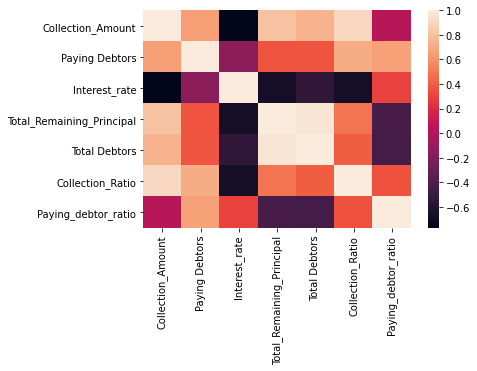

In [71]:
corr= table.corr()
sns.heatmap(corr)